## 数据描述性统计

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.layers import (
    Input, Dense, SimpleRNN, Flatten, Concatenate, Dropout, 
    LSTM, TimeDistributed, MultiHeadAttention, LayerNormalization
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

———————————————————— 缺失值检查 ————————————————————
n                            0
service_rate                 0
m                            0
arrival_rate                 0
CV_list                      0
C_list                       0
ksai                         0
avg_wait_time                0
queue_waiting_length_list    0
avg_pkg_loss_rate            0
dtype: int64
———————————————————— 增加计算字段 ————————————————————
———————————————————— 描述性统计 ————————————————————
                   n   service_rate              m           ksai  \
count  250356.000000  250356.000000  250356.000000  250356.000000   
mean       11.329391       0.043992       5.431689       3.000244   
std         5.636152       0.017027       2.869628       1.413014   
min         1.000000       0.000008       1.000000       1.000000   
25%         7.000000       0.032926       3.000000       2.000000   
50%        12.000000       0.042907       5.000000       3.000000   
75%        16.000000       0.053785       8.00000

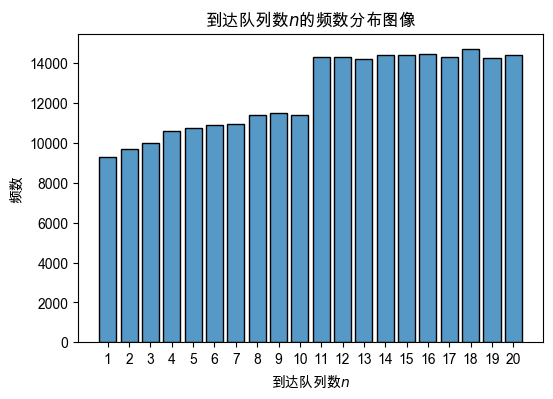

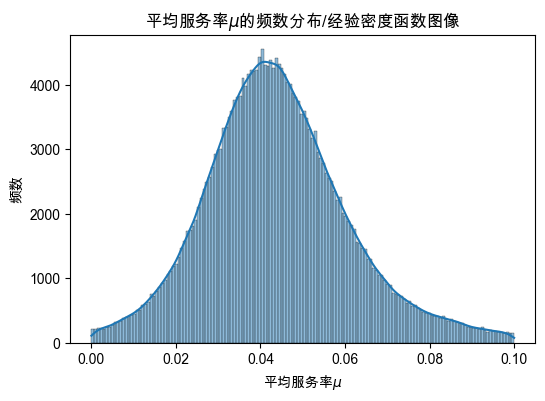

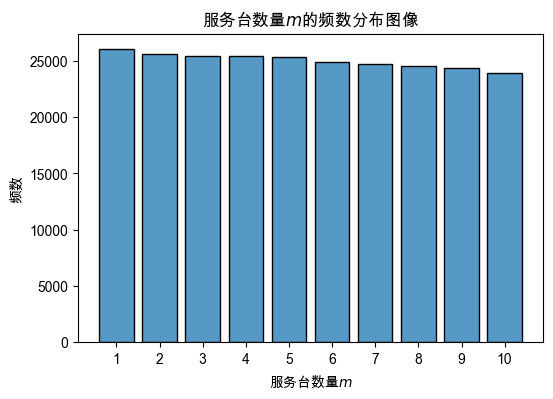

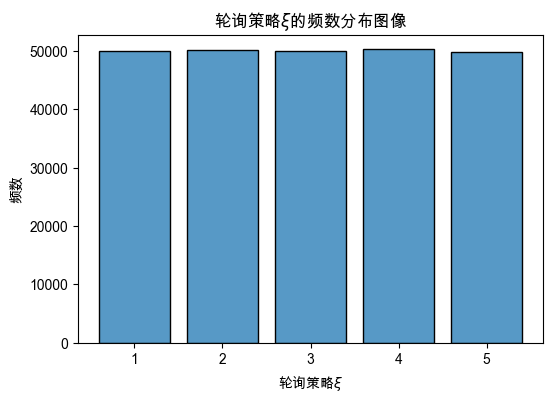

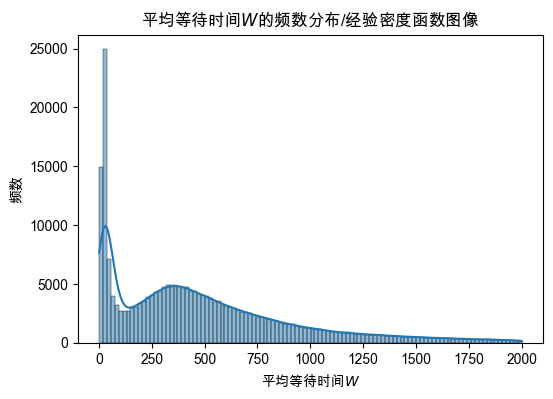

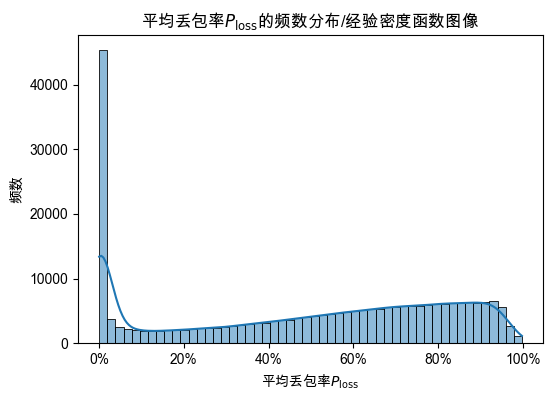

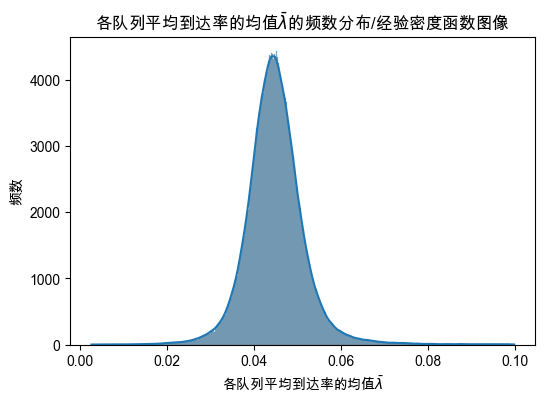

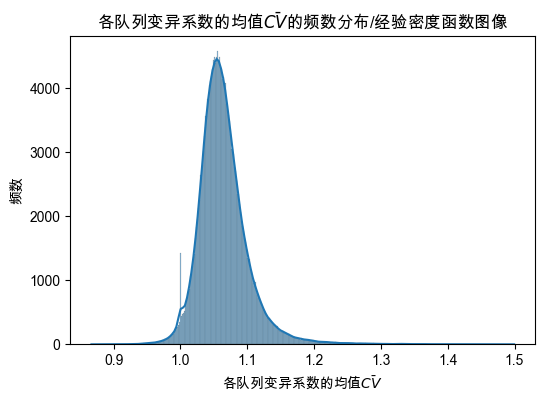

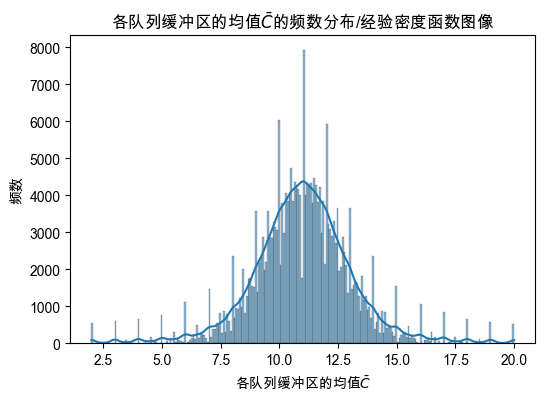

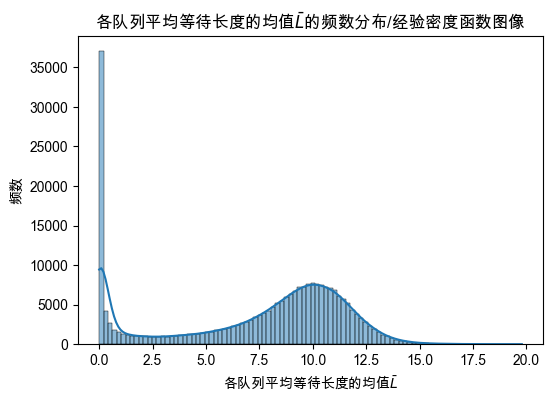

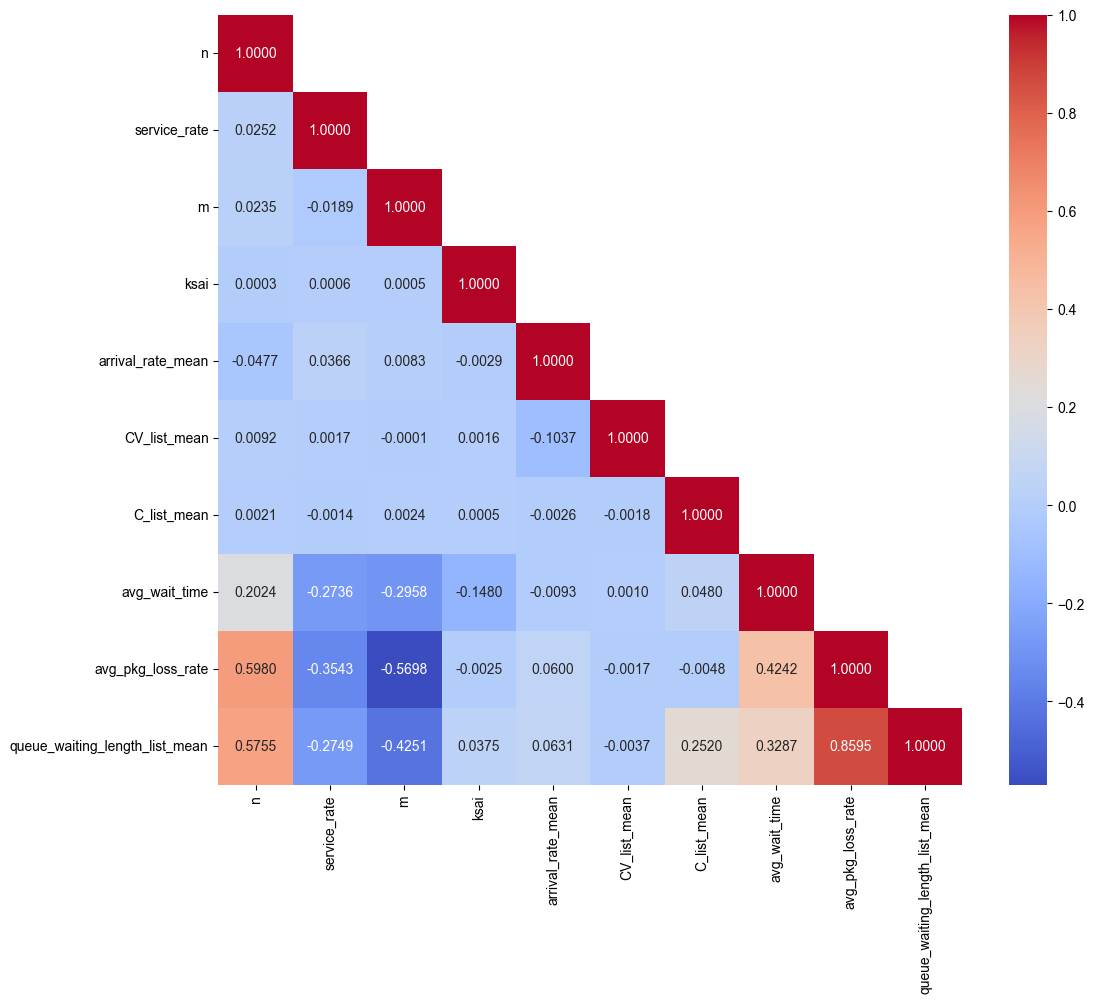

In [27]:
plt.rcParams['font.sans-serif'] = 'Arial Unicode MS'

df = pd.read_excel('RR_simul_data.xlsx')

print('———————————————————— 缺失值检查 ————————————————————')
missing_values = df.isnull().sum()
print(missing_values)

print('———————————————————— 增加计算字段 ————————————————————')
df['arrival_rate_mean'] = df['arrival_rate'].apply(lambda x: np.mean(eval(x)))
df['CV_list_mean'] = df['CV_list'].apply(lambda x: np.mean(eval(x)))
df['C_list_mean'] = df['C_list'].apply(lambda x: np.mean(eval(x)))
df['queue_waiting_length_list_mean'] = df['queue_waiting_length_list'].apply(lambda x: np.mean(eval(x)))

print('———————————————————— 描述性统计 ————————————————————')
desc_stats = df.describe()
print(desc_stats)

save_dir = "图2"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

print('———————————————————— 绘制分布图像 ————————————————————')
# 到达队列数 n
plt.figure(figsize = (6, 4))
sns.histplot(df['n'], kde = False, discrete = True, bins = range(int(df['n'].min()), int(df['n'].max()) + 2), shrink = 0.8)
plt.xticks(range(int(df['n'].min()), int(df['n'].max()) + 1))
plt.title('到达队列数$n$的频数分布图像')
plt.xlabel('到达队列数$n$')
plt.ylabel('频数')
plt.savefig(os.path.join(save_dir, '到达队列数.png'), dpi = 1200)
# plt.show()

# 平均服务率 mu
plt.figure(figsize = (6, 4))
sns.histplot(df[df['service_rate'] <= 0.2]['service_rate'], kde = True)
plt.title('平均服务率$\\mu$的频数分布/经验密度函数图像')
plt.xlabel('平均服务率$\\mu$')
plt.ylabel('频数')
plt.savefig(os.path.join(save_dir, '平均服务率.png'), dpi = 1200)
# plt.show()

# 服务台数量 m
plt.figure(figsize = (6, 4))
sns.histplot(df['m'], kde = False, discrete = True, bins = range(int(df['m'].min()), int(df['m'].max()) + 2), shrink = 0.8)
plt.xticks(range(int(df['m'].min()), int(df['m'].max()) + 1))
plt.title('服务台数量$m$的频数分布图像')
plt.xlabel('服务台数量$m$')
plt.ylabel('频数')
plt.savefig(os.path.join(save_dir, '服务台数量.png'), dpi = 1200)
# plt.show()

# 轮询策略 xi
plt.figure(figsize = (6, 4))
sns.histplot(df['ksai'], kde = False, discrete = True, bins = range(int(df['ksai'].min()), int(df['ksai'].max()) + 2), shrink = 0.8)
plt.xticks(range(int(df['ksai'].min()), int(df['ksai'].max()) + 1))
plt.title('轮询策略$\\xi$的频数分布图像')
plt.xlabel('轮询策略$\\xi$')
plt.ylabel('频数')
plt.savefig(os.path.join(save_dir, '轮询策略.png'), dpi=1200)
# plt.show()

# 平均等待时间 W
plt.figure(figsize = (6, 4))
sns.histplot(df[df['avg_wait_time'] <= 2000]['avg_wait_time'], kde = True)
plt.title('平均等待时间$W$的频数分布/经验密度函数图像')
plt.xlabel('平均等待时间$W$')
plt.ylabel('频数')
plt.savefig(os.path.join(save_dir, '平均等待时间.png'), dpi = 1200)
# plt.show()

# 平均丢包率 P_loss
plt.figure(figsize = (6, 4))
sns.histplot(df['avg_pkg_loss_rate'], kde = True)
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('平均丢包率$P_{\\mathrm{loss}}$的频数分布/经验密度函数图像')
plt.xlabel('平均丢包率$P_{\\mathrm{loss}}$')
plt.ylabel('频数')
plt.savefig(os.path.join(save_dir, '平均丢包率.png'), dpi = 1200)
# plt.show()

# 各队列平均到达率的均值 arrival_rate_mean
plt.figure(figsize = (6, 4))
sns.histplot(df[df['arrival_rate_mean'] <= 0.15]['arrival_rate_mean'], kde = True)
plt.title('各队列平均到达率的均值$\\bar{\\lambda}$的频数分布/经验密度函数图像')
plt.xlabel('各队列平均到达率的均值$\\bar{\\lambda}$')
plt.ylabel('频数')
plt.savefig(os.path.join(save_dir, '各队列平均到达率的均值.png'), dpi = 1200)
# plt.show()

# 各队列变异系数的均值 CV_list_mean
plt.figure(figsize = (6, 4))
sns.histplot(df[df['CV_list_mean'] <= 1.5]['CV_list_mean'], kde = True)
plt.title('各队列变异系数的均值$\\bar{CV}$的频数分布/经验密度函数图像')
plt.xlabel('各队列变异系数的均值$\\bar{CV}$')
plt.ylabel('频数')
plt.savefig(os.path.join(save_dir, '各队列变异系数的均值.png'), dpi = 1200)
# plt.show()

# 各队列缓冲区的均值 C_list_mean
plt.figure(figsize = (6, 4))
sns.histplot(df['C_list_mean'], kde = True)
plt.title('各队列缓冲区的均值$\\bar{C}$的频数分布/经验密度函数图像')
plt.xlabel('各队列缓冲区的均值$\\bar{C}$')
plt.ylabel('频数')
plt.savefig(os.path.join(save_dir, '各队列缓冲区的均值.png'), dpi = 1200)
# plt.show()

# 各队列平均等待长度的均值 queue_waiting_length_list_mean
plt.figure(figsize = (6, 4))
sns.histplot(df['queue_waiting_length_list_mean'], kde = True)
plt.title('各队列平均等待长度的均值$\\bar{L}$的频数分布/经验密度函数图像')
plt.xlabel('各队列平均等待长度的均值$\\bar{L}$')
plt.ylabel('频数')
plt.savefig(os.path.join(save_dir, '各队列平均等待长度的均值.png'), dpi = 1200)
# plt.show()

all_features = [
    'n', 'service_rate', 'm', 'ksai', 'arrival_rate_mean', 'CV_list_mean', 'C_list_mean',
    'avg_wait_time', 'avg_pkg_loss_rate', 'queue_waiting_length_list_mean' # 要预测的变量
]

correlation_matrix_all_features = df[all_features].corr()
mask = np.triu(np.ones_like(correlation_matrix_all_features, dtype = bool), k = 1)
formatted_corr_all_features = correlation_matrix_all_features.round(4)

plt.figure(figsize = (12, 10))
sns.heatmap(formatted_corr_all_features, annot = True, cmap = 'coolwarm', mask = mask, fmt = '.4f')
plt.show()

## 数据预处理

### 老版本

In [2]:
df = pd.read_excel('RR_simul_data.xlsx')

def pad_vector_data(series, max_length):
    series = series.apply(lambda x: eval(x) if isinstance(x, str) else x)
    padded_data = pad_sequences(series.tolist(), maxlen=max_length, padding='post', dtype='float32')
    return padded_data

# 获取最大序列长度
max_n = df['n'].max()

# 对特征序列进行填充
arrival_rate_padded = pad_vector_data(df['arrival_rate'], max_n)
CV_list_padded = pad_vector_data(df['CV_list'], max_n)
C_list_padded = pad_vector_data(df['C_list'], max_n)
queue_waiting_length_list_padded = pad_vector_data(df['queue_waiting_length_list'], max_n)

# 处理数值型特征: 使用标准化
scaler = StandardScaler()
numeric_features = df[['service_rate', 'm', 'ksai']]
numeric_features_scaled = scaler.fit_transform(numeric_features)

# 对目标变量处理缺失值，这里使用通过均值填充的方法
df['avg_wait_time'].fillna(df['avg_wait_time'].mean(), inplace=True)
df['avg_pkg_loss_rate'].fillna(df['avg_pkg_loss_rate'].mean(), inplace=True)

# 准备模型的目标变量
y_wait_time = df['avg_wait_time'].values
y_pkg_loss_rate = df['avg_pkg_loss_rate'].values

# 标准化目标变量
scaler_wait_time = StandardScaler()
scaler_pkg_loss_rate = StandardScaler()
scaler_queue_waiting_length = StandardScaler()

# 对 avg_wait_time 和 avg_pkg_loss_rate 进行标准化
y_wait_time_scaled = scaler_wait_time.fit_transform(y_wait_time.reshape(-1, 1)).flatten()
y_pkg_loss_rate_scaled = scaler_pkg_loss_rate.fit_transform(y_pkg_loss_rate.reshape(-1, 1)).flatten()

# 对 queue_waiting_length_list_padded 的每一列进行标准化
y_queue_waiting_length_scaled = scaler_queue_waiting_length.fit_transform(queue_waiting_length_list_padded)

# 初始化OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# 对ksai进行编码
ksai_encoded = encoder.fit_transform(df[['ksai']])

# 将编码后的ksai添加到数值特征中
numeric_features_scaled = np.concatenate([numeric_features_scaled, ksai_encoded], axis=1)

# 拆分训练集和测试集
X_train_numeric, X_test_numeric, y_train_wait, y_test_wait = train_test_split(
    numeric_features_scaled, y_wait_time_scaled, test_size=0.2, random_state=42)
X_train_arrival, X_test_arrival, y_train_pkg_loss, y_test_pkg_loss = train_test_split(
    arrival_rate_padded, y_pkg_loss_rate_scaled, test_size=0.2, random_state=42)
X_train_CV, X_test_CV, y_train_queue, y_test_queue = train_test_split(
    CV_list_padded, y_queue_waiting_length_scaled, test_size=0.2, random_state=42)

# 模型的序列输入需要是一个3D张量，堆叠所有填充后的序列特征
X_train_sequence = np.dstack((X_train_arrival, X_train_CV))
X_test_sequence = np.dstack((X_test_arrival, X_test_CV))

# 确保训练和测试集的形状匹配模型预期的输入
print("X_train_numeric shape:", X_train_numeric.shape)
print("X_train_sequence shape:", X_train_sequence.shape)
print("y_train_wait shape:", y_train_wait.shape)
print("y_train_pkg_loss shape:", y_train_pkg_loss.shape)
print("y_train_queue shape:", y_train_queue.shape)

# 检验测试集的维度信息
print("X_test_numeric shape:", X_test_numeric.shape)
print("X_test_sequence shape:", X_test_sequence.shape)
print("y_test_wait shape:", y_test_wait.shape)
print("y_test_pkg_loss shape:", y_test_pkg_loss.shape)
print("y_test_queue shape:", y_test_queue.shape)

X_train_numeric shape: (200284, 8)
X_train_sequence shape: (200284, 20, 2)
y_train_wait shape: (200284,)
y_train_pkg_loss shape: (200284,)
y_train_queue shape: (200284, 20)
X_test_numeric shape: (50072, 8)
X_test_sequence shape: (50072, 20, 2)
y_test_wait shape: (50072,)
y_test_pkg_loss shape: (50072,)
y_test_queue shape: (50072, 20)


/var/folders/bm/5zhyhc095_776vjnmvj658p00000gn/T/ipykernel_1227/4094093158.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_wait_time'].fillna(df['avg_wait_time'].mean(), inplace=True)
/var/folders/bm/5zhyhc095_776vjnmvj658p00000gn/T/ipykernel_1227/4094093158.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

### 新版本

In [3]:
df = pd.read_excel('RR_simul_data.xlsx')

# 标准化并填充序列特征数据
def pad_vector_data(series, max_length, scaler=None):
    # 将字符串表示的列表转换为实际的列表
    series = series.apply(lambda x: eval(x) if isinstance(x, str) else x)
    # 逐列（时间步）对非填充序列进行标准化
    standardized_data = []
    for col in zip(*series):
        reshaped_col = np.array(col).reshape(-1, 1)  # 从1D list转为2D np.array
        col_scaled = scaler.fit_transform(reshaped_col) if scaler else reshaped_col
        standardized_data.append(col_scaled.flatten())
    standardized_data = np.array(standardized_data).T  # 转置回正确的形状
    # 根据标准化后的数据长度进行填充
    padded_data = pad_sequences(standardized_data, maxlen=max_length, padding='post', value=0.0, dtype='float32')
    return padded_data

# 获取最大序列长度
max_n = df['n'].max()

# 实例化scaler
scaler = StandardScaler()

# 对序列型特征进行标准化和填充
arrival_rate_padded = pad_vector_data(df['arrival_rate'], max_n, scaler)
CV_list_padded = pad_vector_data(df['CV_list'], max_n, scaler)
C_list_padded = pad_vector_data(df['C_list'], max_n, scaler)
queue_waiting_length_list_padded = pad_vector_data(df['queue_waiting_length_list'], max_n, scaler)

# 处理数值型特征: 使用标准化
scaler2 = StandardScaler()
numeric_features = df[['n', 'service_rate', 'm']]
numeric_features_scaled = scaler2.fit_transform(numeric_features)

# 对ksai进行One-Hot编码
encoder = OneHotEncoder(sparse=False)
ksai_encoded = encoder.fit_transform(df[['ksai']])

# 将编码后的ksai合并到数值特征中
numeric_features_scaled = np.concatenate([numeric_features_scaled, ksai_encoded], axis=1)

# 对目标变量处理缺失值，这里使用通过均值填充的方法
df['avg_wait_time'] = df['avg_wait_time'].fillna(df['avg_wait_time'].mean())
df['avg_pkg_loss_rate'] = df['avg_pkg_loss_rate'].fillna(df['avg_pkg_loss_rate'].mean())

# 准备模型的目标变量
y_wait_time = df['avg_wait_time'].values
y_pkg_loss_rate = df['avg_pkg_loss_rate'].values

# 标准化目标变量
scaler_wait_time = StandardScaler()
scaler_pkg_loss_rate = StandardScaler()
scaler_queue_waiting_length = StandardScaler()

# 对 avg_wait_time 和 avg_pkg_loss_rate 进行标准化
y_wait_time_scaled = scaler_wait_time.fit_transform(y_wait_time.reshape(-1, 1)).flatten()
y_pkg_loss_rate_scaled = scaler_pkg_loss_rate.fit_transform(y_pkg_loss_rate.reshape(-1, 1)).flatten()

# 对 queue_waiting_length_list_padded 的每一列进行标准化
y_queue_waiting_length_scaled = scaler_queue_waiting_length.fit_transform(queue_waiting_length_list_padded)

# 拆分训练集和测试集
X_train_numeric, X_test_numeric, y_train_wait, y_test_wait = train_test_split(
    numeric_features_scaled, y_wait_time_scaled, test_size=0.2, random_state=42)
X_train_arrival, X_test_arrival, y_train_pkg_loss, y_test_pkg_loss = train_test_split(
    arrival_rate_padded, y_pkg_loss_rate_scaled, test_size=0.2, random_state=42)
X_train_CV, X_test_CV, y_train_queue, y_test_queue = train_test_split(
    CV_list_padded, y_queue_waiting_length_scaled, test_size=0.2, random_state=42)

# 模型的序列输入需要是一个3D张量，堆叠所有填充后的序列特征
X_train_sequence = np.dstack((X_train_arrival, X_train_CV))
X_test_sequence = np.dstack((X_test_arrival, X_test_CV))

# 确保训练和测试集的形状匹配模型预期的输入
print("X_train_numeric shape:", X_train_numeric.shape)
print("X_train_sequence shape:", X_train_sequence.shape)    
print("y_train_wait shape:", y_train_wait.shape)
print("y_train_pkg_loss shape:", y_train_pkg_loss.shape)
print("y_train_queue shape:", y_train_queue.shape)

# 检验测试集的维度信息
print("X_test_numeric shape:", X_test_numeric.shape)
print("X_test_sequence shape:", X_test_sequence.shape)
print("y_test_wait shape:", y_test_wait.shape)
print("y_test_pkg_loss shape:", y_test_pkg_loss.shape)
print("y_test_queue shape:", y_test_queue.shape)

X_train_numeric shape: (200284, 8)
X_train_sequence shape: (200284, 20, 2)
y_train_wait shape: (200284,)
y_train_pkg_loss shape: (200284,)
y_train_queue shape: (200284, 20)
X_test_numeric shape: (50072, 8)
X_test_sequence shape: (50072, 20, 2)
y_test_wait shape: (50072,)
y_test_pkg_loss shape: (50072,)
y_test_queue shape: (50072, 20)


## 模型构建

在模型训练前，思考以下几个问题：
- 【**已解决：并性实验**】是否要同时使用 Dropout 和 L2正则化；
- 【**已解决：标准化**】要预测的变量是 avg_wait_time、queue_waiting_length_list 和 avg_pkg_loss_rate，但是三者的数量级差距太大，这会使得在训练模型时损失函数的下降偏向于数量级更大的变量；
- 损失函数权重是否与实际情境的“成本”挂钩？
```Python
model.compile(optimizer=optimizer,
              loss={
                  'wait_time_output': 'mse',
                  'queue_length_output': 'mse',
                  'pkg_loss_rate_output': 'mse'
              },
              loss_weights={
                  'wait_time_output': 1.0,
                  'queue_length_output': 0.5,
                  'pkg_loss_rate_output': 0.5
              },  # 调整损失函数权重
              metrics={
                  'wait_time_output': 'mae',
                  'queue_length_output': 'mae',
                  'pkg_loss_rate_output': 'mae'
              })
```

### 1. DNN

#### 1.1 纯DNN

In [4]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# 序列特征扁平化
flattened_sequence_input = Flatten()(sequence_input)

# 合并数值输入和扁平化后的序列输入
combined_input = Concatenate()([numeric_input, flattened_sequence_input])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu')(combined_input)
dense_2 = Dense(64, activation='relu')(dense_1)
dense_3 = Dense(32, activation='relu')(dense_2)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_3)
queue_length_output = Dense(X_train_sequence.shape[1], activation='linear', name='queue_length_output')(dense_3)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_3)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input],
                                outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
                                loss={
                                    'wait_time_output': 'mse',
                                    'queue_length_output': 'mse',
                                    'pkg_loss_rate_output': 'mse',
                                },
                                metrics={
                                    'wait_time_output': 'mae',
                                    'queue_length_output': 'mae',
                                    'pkg_loss_rate_output': 'mae',
                                })

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")
print(f"Queue length MAE: {queue_length_mae}")

# 绘制 avg_wait_time 的训练损失和验证损失
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history["wait_time_output_loss"], label="Training Wait Time Loss")
plt.plot(
    history.history["val_wait_time_output_loss"], label="Validation Wait Time Loss"
)
plt.title("Training and Validation Loss for Avg Wait Time")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 绘制 avg_pkg_loss_rate 的训练损失和验证损失
plt.subplot(1, 3, 2)
plt.plot(
    history.history["pkg_loss_rate_output_loss"], label="Training Pkg Loss Rate Loss"
)
plt.plot(
    history.history["val_pkg_loss_rate_output_loss"],
    label="Validation Pkg Loss Rate Loss",
)
plt.title("Training and Validation Loss for Pkg Loss Rate")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 绘制 queue_waiting_length_list 的训练损失和验证损失
plt.subplot(1, 3, 3)
plt.plot(
    history.history["queue_waiting_length_output_loss"],
    label="Training Queue Waiting Length Loss",
)
plt.plot(
    history.history["val_queue_waiting_length_output_loss"],
    label="Validation Queue Waiting Length Loss",
)
plt.title("Training and Validation Loss for Queue Waiting Length")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 numeric_input (InputLayer)  [(None, 8)]                  0         []                            
                                                                                                  
 flatten (Flatten)           (None, 40)                   0         ['sequence_input[0][0]']      
                                                                                                  
 concatenate (Concatenate)   (None, 48)                   0         ['numeric_input[0][0]',   

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6209/6259 [============================>.] - ETA: 0s - loss: 0.2928 - wait_time_output_loss: 0.2386 - queue_length_output_loss: 0.0280 - pkg_loss_rate_output_loss: 0.0261 - wait_time_output_mae: 0.1067 - queue_length_output_mae: 0.0300 - pkg_loss_rate_output_mae: 0.1108
Epoch 2: val_loss did not improve from 0.28250
6259/6259 [==============================] - 6s 1ms/step - loss: 0.2956 - wait_time_output_loss: 0.2414 - queue_length_output_loss: 0.0280 - pkg_loss_rate_output_loss: 0.0261 - wait_time_output_mae: 0.1070 - queue_length_output_mae: 0.0300 - pkg_loss_rate_output_mae: 0.1108 - val_loss: 0.3982 - val_wait_time_output_loss: 0.3404 - val_queue_length_output_loss: 0.0283 - val_pkg_loss_rate_output_loss: 0.0295 - val_wait_time_output_mae: 0.1393 - val_queue_length_output_mae: 0.0292 - val_pkg_loss_rate_output_mae: 0.1172 - lr: 0.0010
Epoch 3/200
6254/6259 [============================>.] - ETA: 0s - loss: 0.2669 - wait_time_output_loss: 0.2138 - queue_length_output_loss: 0.0276 -

KeyboardInterrupt: 

#### 1.2 DNN + Dropout

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 numeric_input (InputLayer)  [(None, 3)]                  0         []                            
                                                                                                  
 flatten_1 (Flatten)         (None, 40)                   0         ['sequence_input[0][0]']      
                                                                                                  
 concatenate_1 (Concatenate  (None, 43)                   0         ['numeric_input[0][0]', 

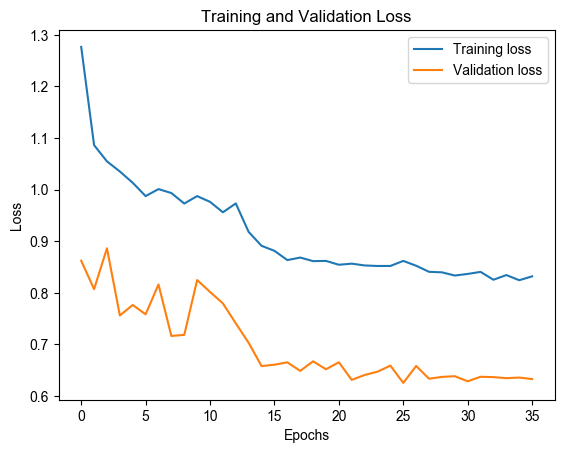

In [ ]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# 序列特征扁平化
flattened_sequence_input = Flatten()(sequence_input)

# 合并数值输入和扁平化后的序列输入
combined_input = Concatenate()([numeric_input, flattened_sequence_input])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu')(combined_input)
dropout_1 = Dropout(0.3)(dense_1)
dense_2 = Dense(64, activation='relu')(dropout_1)
dropout_2 = Dropout(0.3)(dense_2)
dense_3 = Dense(32, activation='relu')(dropout_2)
dropout_3 = Dropout(0.3)(dense_3)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dropout_3)
queue_length_output = Dense(X_train_sequence.shape[1], activation='linear', name='queue_length_output')(dropout_3)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dropout_3)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input],
                      outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
                      loss={
                          'wait_time_output': 'mse',
                          'queue_length_output': 'mse',
                          'pkg_loss_rate_output': 'mse',
                      },
                      metrics={
                          'wait_time_output': 'mae',
                          'queue_length_output': 'mae',
                          'pkg_loss_rate_output': 'mae',
                      })

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")
print(f"Queue length MAE: {queue_length_mae}")

# 绘制 avg_wait_time 的训练损失和验证损失
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history["wait_time_output_loss"], label="Training Wait Time Loss")
plt.plot(
    history.history["val_wait_time_output_loss"], label="Validation Wait Time Loss"
)
plt.title("Training and Validation Loss for Avg Wait Time")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 绘制 avg_pkg_loss_rate 的训练损失和验证损失
plt.subplot(1, 3, 2)
plt.plot(
    history.history["pkg_loss_rate_output_loss"], label="Training Pkg Loss Rate Loss"
)
plt.plot(
    history.history["val_pkg_loss_rate_output_loss"],
    label="Validation Pkg Loss Rate Loss",
)
plt.title("Training and Validation Loss for Pkg Loss Rate")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 绘制 queue_waiting_length_list 的训练损失和验证损失
plt.subplot(1, 3, 3)
plt.plot(
    history.history["queue_waiting_length_output_loss"],
    label="Training Queue Waiting Length Loss",
)
plt.plot(
    history.history["val_queue_waiting_length_output_loss"],
    label="Validation Queue Waiting Length Loss",
)
plt.title("Training and Validation Loss for Queue Waiting Length")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

#### 1.3 DNN + L2正则化

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 numeric_input (InputLayer)  [(None, 3)]                  0         []                            
                                                                                                  
 flatten_2 (Flatten)         (None, 40)                   0         ['sequence_input[0][0]']      
                                                                                                  
 concatenate_2 (Concatenate  (None, 43)                   0         ['numeric_input[0][0]', 

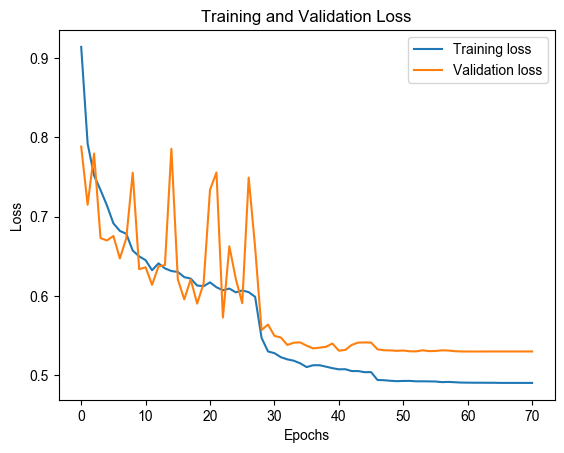

In [ ]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# 序列特征扁平化
flattened_sequence_input = Flatten()(sequence_input)

# 合并数值输入和扁平化后的序列输入
combined_input = Concatenate()([numeric_input, flattened_sequence_input])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(combined_input)
dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(dense_1)
dense_3 = Dense(32, activation='relu', kernel_regularizer=l2(1e-4))(dense_2)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_3)
queue_length_output = Dense(X_train_sequence.shape[1], activation='linear', name='queue_length_output')(dense_3)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_3)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input],
                 outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
                 loss={
                     'wait_time_output': 'mse',
                     'queue_length_output': 'mse',
                     'pkg_loss_rate_output': 'mse',
                 },
                 metrics={
                     'wait_time_output': 'mae',
                     'queue_length_output': 'mae',
                     'pkg_loss_rate_output': 'mae',
                 })

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")
print(f"Queue length MAE: {queue_length_mae}")

# 绘制 avg_wait_time 的训练损失和验证损失
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history["wait_time_output_loss"], label="Training Wait Time Loss")
plt.plot(
    history.history["val_wait_time_output_loss"], label="Validation Wait Time Loss"
)
plt.title("Training and Validation Loss for Avg Wait Time")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 绘制 avg_pkg_loss_rate 的训练损失和验证损失
plt.subplot(1, 3, 2)
plt.plot(
    history.history["pkg_loss_rate_output_loss"], label="Training Pkg Loss Rate Loss"
)
plt.plot(
    history.history["val_pkg_loss_rate_output_loss"],
    label="Validation Pkg Loss Rate Loss",
)
plt.title("Training and Validation Loss for Pkg Loss Rate")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 绘制 queue_waiting_length_list 的训练损失和验证损失
plt.subplot(1, 3, 3)
plt.plot(
    history.history["queue_waiting_length_output_loss"],
    label="Training Queue Waiting Length Loss",
)
plt.plot(
    history.history["val_queue_waiting_length_output_loss"],
    label="Validation Queue Waiting Length Loss",
)
plt.title("Training and Validation Loss for Queue Waiting Length")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

#### 1.4 DNN + Dropout + L2正则化

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 numeric_input (InputLayer)  [(None, 3)]                  0         []                            
                                                                                                  
 flatten_3 (Flatten)         (None, 40)                   0         ['sequence_input[0][0]']      
                                                                                                  
 concatenate_3 (Concatenate  (None, 43)                   0         ['numeric_input[0][0]', 

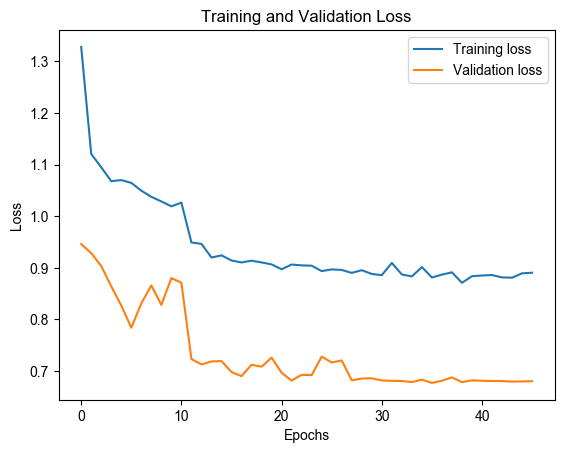

In [ ]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# 序列特征扁平化
flattened_sequence_input = Flatten()(sequence_input)

# 合并数值输入和扁平化后的序列输入
combined_input = Concatenate()([numeric_input, flattened_sequence_input])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(combined_input)
dropout_1 = Dropout(0.3)(dense_1)  # 添加 Dropout 层以减少过拟合
dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(dropout_1)
dropout_2 = Dropout(0.3)(dense_2)  # 添加 Dropout
dense_3 = Dense(32, activation='relu', kernel_regularizer=l2(1e-4))(dropout_2)
dropout_3 = Dropout(0.3)(dense_3)  # 添加 Dropout

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dropout_3)
queue_length_output = Dense(X_train_sequence.shape[1], activation='linear', name='queue_length_output')(dropout_3) # 直接预测所有10个时间步的输出，使用linear激活函数
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dropout_3)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input],
              outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={
                  'wait_time_output': 'mse',
                  'queue_length_output': 'mse',
                  'pkg_loss_rate_output': 'mse',
              }, 
              metrics={
                  'wait_time_output': 'mae',
                  'queue_length_output': 'mae',
                  'pkg_loss_rate_output': 'mae',
              })

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")
print(f"Queue length MAE: {queue_length_mae}")

# 绘制 avg_wait_time 的训练损失和验证损失
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history["wait_time_output_loss"], label="Training Wait Time Loss")
plt.plot(
    history.history["val_wait_time_output_loss"], label="Validation Wait Time Loss"
)
plt.title("Training and Validation Loss for Avg Wait Time")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 绘制 avg_pkg_loss_rate 的训练损失和验证损失
plt.subplot(1, 3, 2)
plt.plot(
    history.history["pkg_loss_rate_output_loss"], label="Training Pkg Loss Rate Loss"
)
plt.plot(
    history.history["val_pkg_loss_rate_output_loss"],
    label="Validation Pkg Loss Rate Loss",
)
plt.title("Training and Validation Loss for Pkg Loss Rate")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 绘制 queue_waiting_length_list 的训练损失和验证损失
plt.subplot(1, 3, 3)
plt.plot(
    history.history["queue_waiting_length_output_loss"],
    label="Training Queue Waiting Length Loss",
)
plt.plot(
    history.history["val_queue_waiting_length_output_loss"],
    label="Validation Queue Waiting Length Loss",
)
plt.title("Training and Validation Loss for Queue Waiting Length")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

### 2. RNN

#### 2.1 纯RNN

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 numeric_input (InputLayer)  [(None, 3)]                  0         []                            
                                                                                                  
 simple_rnn (SimpleRNN)      (None, 32)                   1120      ['sequence_input[0][0]']      
                                                                                                  
 concatenate_4 (Concatenate  (None, 35)                   0         ['numeric_input[0][0]', 

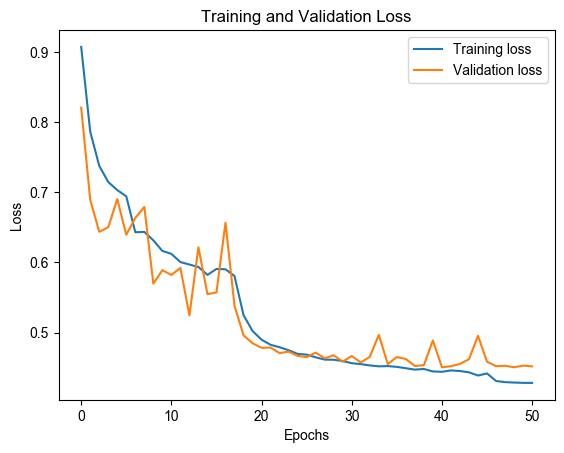

In [8]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# RNN 层
rnn_out = SimpleRNN(32, return_sequences=False)(sequence_input)

# 合并数值输入和 RNN 输出
combined_input = Concatenate()([numeric_input, rnn_out])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu')(combined_input)
dense_2 = Dense(64, activation='relu')(dense_1)
dense_3 = Dense(32, activation='relu')(dense_2)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_3)
queue_length_output = Dense(X_train_sequence.shape[1], activation='linear', name='queue_length_output')(dense_3)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_3)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input],
                                    outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
                                    loss={
                                        'wait_time_output': 'mse',
                                        'queue_length_output': 'mse',
                                        'pkg_loss_rate_output': 'mse',
                                    },
                                    metrics={
                                        'wait_time_output': 'mae',
                                        'queue_length_output': 'mae',
                                        'pkg_loss_rate_output': 'mae',
                                    })

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/2.1.png', dpi = 1200)
plt.show()

#### 2.2 RNN + Dropout

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 numeric_input (InputLayer)  [(None, 3)]                  0         []                            
                                                                                                  
 simple_rnn_1 (SimpleRNN)    (None, 32)                   1120      ['sequence_input[0][0]']      
                                                                                                  
 concatenate_5 (Concatenate  (None, 35)                   0         ['numeric_input[0][0]', 

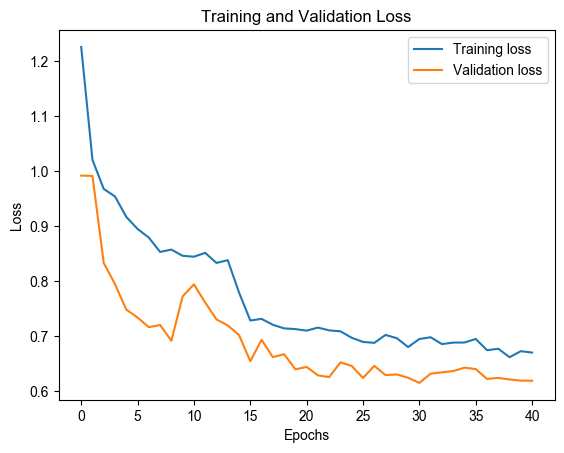

In [9]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# RNN 层
rnn_out = SimpleRNN(32, return_sequences=False)(sequence_input)

# 合并数值输入和 RNN 输出
combined_input = Concatenate()([numeric_input, rnn_out])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu')(combined_input)
dropout_1 = Dropout(0.5)(dense_1)
dense_2 = Dense(64, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(dense_2)
dense_3 = Dense(32, activation='relu')(dropout_2)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_3)
queue_length_output = Dense(X_train_sequence.shape[1], activation='linear', name='queue_length_output')(dense_3)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_3)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input],
                          outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
                          loss={
                              'wait_time_output': 'mse',
                              'queue_length_output': 'mse',
                              'pkg_loss_rate_output': 'mse',
                          },
                          metrics={
                              'wait_time_output': 'mae',
                              'queue_length_output': 'mae',
                              'pkg_loss_rate_output': 'mae',
                          })

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/2.2.png', dpi = 1200)
plt.show()

#### 2.3 RNN + L2正则化

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 numeric_input (InputLayer)  [(None, 8)]                  0         []                            
                                                                                                  
 simple_rnn (SimpleRNN)      (None, 32)                   1120      ['sequence_input[0][0]']      
                                                                                                  
 concatenate_2 (Concatenate  (None, 40)                   0         ['numeric_input[0][0]', 

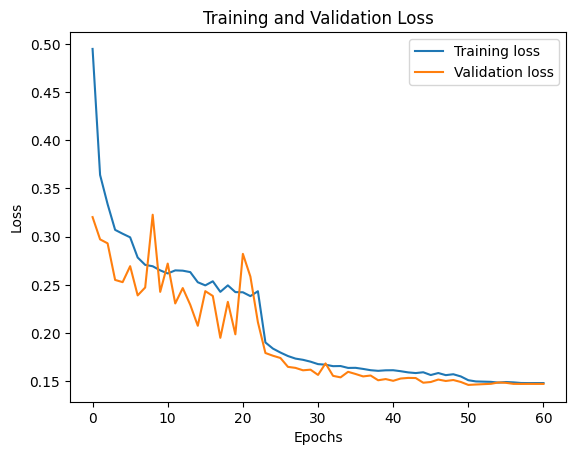

In [8]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# RNN 层
rnn_out = SimpleRNN(32, return_sequences=False, kernel_regularizer=l2(0.001))(sequence_input)

# 合并数值输入和 RNN 输出
combined_input = Concatenate()([numeric_input, rnn_out])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(combined_input)
dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(dense_1)
dense_3 = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(dense_2)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_3)
queue_length_output = Dense(X_train_sequence.shape[1], activation='linear', name='queue_length_output')(dense_3)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_3)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input],
                     outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
                     loss={
                         'wait_time_output': 'mse',
                         'queue_length_output': 'mse',
                         'pkg_loss_rate_output': 'mse',
                     },
                     metrics={
                         'wait_time_output': 'mae',
                         'queue_length_output': 'mae',
                         'pkg_loss_rate_output': 'mae',
                     })

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/2.3.png', dpi = 1200)
plt.show()

#### 2.4 RNN + Dropout + L2正则化

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 numeric_input (InputLayer)  [(None, 3)]                  0         []                            
                                                                                                  
 simple_rnn_3 (SimpleRNN)    (None, 32)                   1120      ['sequence_input[0][0]']      
                                                                                                  
 concatenate_7 (Concatenate  (None, 35)                   0         ['numeric_input[0][0]', 

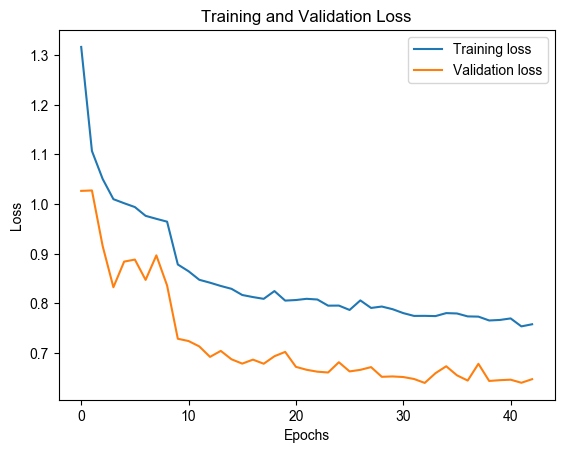

In [11]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# RNN 层
rnn_out = SimpleRNN(32, return_sequences=False)(sequence_input)  # 使用简单的 RNN

# 合并数值输入和 RNN 输出
combined_input = Concatenate()([numeric_input, rnn_out])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(combined_input)
dropout_1 = Dropout(0.5)(dense_1)  # Dropout层
dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(dropout_1)
dropout_2 = Dropout(0.5)(dense_2)  # Dropout层
dense_3 = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(dropout_2)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_3)
queue_length_output = Dense(X_train_sequence.shape[1], activation='linear', name='queue_length_output')(dense_3) # 直接预测所有10个时间步的输出，使用linear激活函数
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_3)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input],
              outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={
                  'wait_time_output': 'mse',
                  'queue_length_output': 'mse',
                  'pkg_loss_rate_output': 'mse',
              }, 
              metrics={
                  'wait_time_output': 'mae',
                  'queue_length_output': 'mae',
                  'pkg_loss_rate_output': 'mae',
              })

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/2.4.png', dpi = 1200)
plt.show()

### 3. LSTM

#### 3.1 纯LSTM

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 lstm_layer (LSTM)           (None, 20, 64)               17152     ['sequence_input[0][0]']      
                                                                                                  
 numeric_input (InputLayer)  [(None, 3)]                  0         []                            
                                                                                                  
 flatten_4 (Flatten)         (None, 1280)                 0         ['lstm_layer[0][0]']    

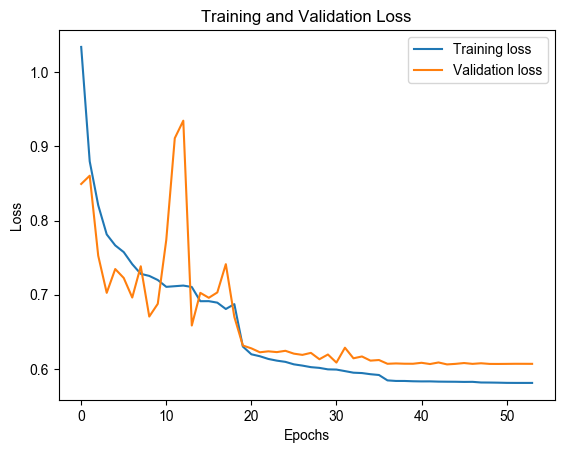

In [12]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# LSTM 层
lstm_out = LSTM(64, return_sequences=True, name='lstm_layer')(sequence_input)

# 序列输出和数值型输入的合并
flattened_sequence_out = Flatten()(lstm_out)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu', name='dense_1')(combined_input)
dense_2 = Dense(64, activation='relu', name='dense_2')(dense_1)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(lstm_out)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input],
                                     outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
                                     loss={
                                         'wait_time_output': 'mse',
                                         'queue_length_output': 'mse',
                                         'pkg_loss_rate_output': 'mse'
                                     },
                                     metrics={
                                         'wait_time_output': 'mae',
                                         'queue_length_output': 'mae',
                                         'pkg_loss_rate_output': 'mae'
                                     })

# 打印模型摘要
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/3.1.png', dpi = 1200)
plt.show()

#### 3.2 LSTM + Dropout

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 lstm_layer (LSTM)           (None, 20, 64)               17152     ['sequence_input[0][0]']      
                                                                                                  
 lstm_dropout (Dropout)      (None, 20, 64)               0         ['lstm_layer[0][0]']          
                                                                                                  
 numeric_input (InputLayer)  [(None, 3)]                  0         []                      

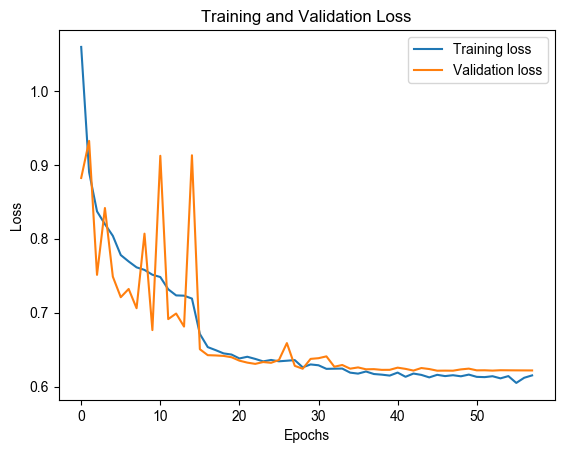

In [13]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# LSTM 层
lstm_out = LSTM(64, return_sequences=True, name='lstm_layer')(sequence_input)
lstm_out = Dropout(0.2, name='lstm_dropout')(lstm_out)  # 添加 Dropout 减轻过拟合

# 序列输出和数值型输入的合并
flattened_sequence_out = Flatten()(lstm_out)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu', name='dense_1')(combined_input)
dense_2 = Dense(64, activation='relu', name='dense_2')(dense_1)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(lstm_out)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input],
                           outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
                           loss={
                               'wait_time_output': 'mse',
                               'queue_length_output': 'mse',
                               'pkg_loss_rate_output': 'mse'
                           },
                           metrics={
                               'wait_time_output': 'mae',
                               'queue_length_output': 'mae',
                               'pkg_loss_rate_output': 'mae'
                           })

# 打印模型摘要
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/3.2.png', dpi = 1200)
plt.show()

#### 3.3 LSTM + L2正则化

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 lstm_layer (LSTM)           (None, 20, 64)               17152     ['sequence_input[0][0]']      
                                                                                                  
 numeric_input (InputLayer)  [(None, 3)]                  0         []                            
                                                                                                  
 flatten_6 (Flatten)         (None, 1280)                 0         ['lstm_layer[0][0]']   

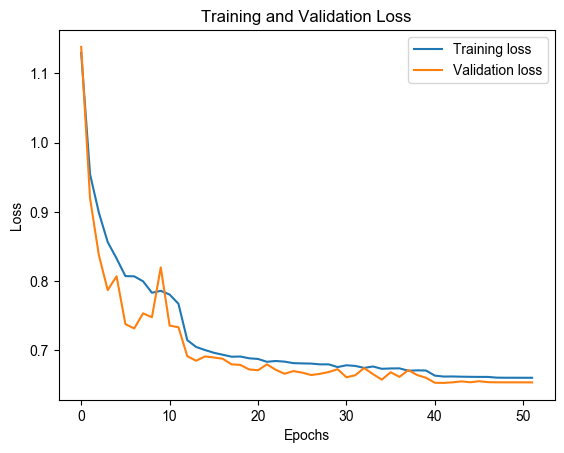

In [14]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# LSTM 层
lstm_out = LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001), name='lstm_layer')(sequence_input)

# 序列输出和数值型输入的合并
flattened_sequence_out = Flatten()(lstm_out)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu', kernel_regularizer=l2(0.001), name='dense_1')(combined_input)
dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(0.001), name='dense_2')(dense_1)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(lstm_out)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input],
                      outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
                      loss={
                          'wait_time_output': 'mse',
                          'queue_length_output': 'mse',
                          'pkg_loss_rate_output': 'mse'
                      },
                      metrics={
                          'wait_time_output': 'mae',
                          'queue_length_output': 'mae',
                          'pkg_loss_rate_output': 'mae'
                      })

# 打印模型摘要
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/3.3.png', dpi = 1200)
plt.show()

#### 3.4 LSTM + Dropout + L2正则化

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 lstm_layer (LSTM)           (None, 20, 64)               17152     ['sequence_input[0][0]']      
                                                                                                  
 lstm_dropout (Dropout)      (None, 20, 64)               0         ['lstm_layer[0][0]']          
                                                                                                  
 numeric_input (InputLayer)  [(None, 3)]                  0         []                     

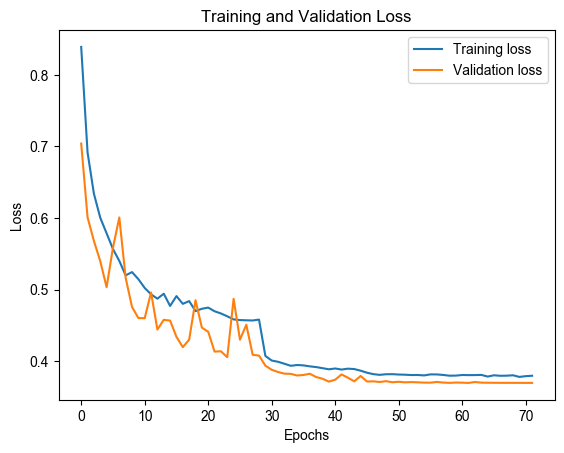

In [15]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# LSTM 层
lstm_out = LSTM(64, return_sequences=True, name='lstm_layer')(sequence_input)  # 尝试增加神经元数
lstm_out = Dropout(0.2, name='lstm_dropout')(lstm_out)  # 添加 Dropout 减轻过拟合

# 序列输出和数值型输入的合并
flattened_sequence_out = Flatten()(lstm_out)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接(Dense)层
dense_1 = Dense(128, activation='relu', kernel_regularizer=l2(0.001), name='dense_1')(combined_input)  # 增加神经元数，并添加 L2 正则化
dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(0.001), name='dense_2')(dense_1)  # 同上

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(lstm_out)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input], outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 自定义优化器和学习速率
optimizer = Adam(learning_rate=0.001)  # 调整学习速率

# 编译模型
model.compile(optimizer=optimizer,
              loss={
                  'wait_time_output': 'mse',
                  'queue_length_output': 'mse',
                  'pkg_loss_rate_output': 'mse'
              },
              loss_weights={
                  'wait_time_output': 1.0,
                  'queue_length_output': 0.5,
                  'pkg_loss_rate_output': 0.5
              },  # 调整损失函数权重
              metrics={
                  'wait_time_output': 'mae',
                  'queue_length_output': 'mae',
                  'pkg_loss_rate_output': 'mae'
              })

# 打印模型摘要
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/3.4.png', dpi = 1200)
plt.show()

### 4. Transformer + Position Encoding

#### 4.1 Transformer + Position Encoding

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 tf.__operators__.add (TFOp  (None, 20, 2)                0         ['sequence_input[0][0]']      
 Lambda)                                                                                          
                                                                                                  
 multi_head_attention (Mult  (None, 20, 2)                90        ['tf.__operators__.add[0][0]',
 iHeadAttention)                                                     'tf.__operators__.add[

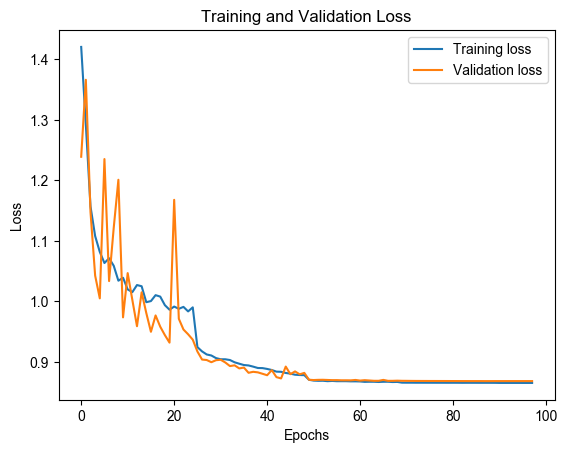

In [16]:
# 位置编码层
def get_positional_encoding(max_seq_len, embed_dim):
    positional_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / embed_dim) for j in range(embed_dim)]
        if pos != 0 else np.zeros(embed_dim) 
        for pos in range(max_seq_len)
    ])
    positional_enc[1:, 0::2] = np.sin(positional_enc[1:, 0::2])  # dim 2i
    positional_enc[1:, 1::2] = np.cos(positional_enc[1:, 1::2])  # dim 2i+1
    return positional_enc

# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# 获取序列最大长度和嵌入维度
seq_len = X_train_sequence.shape[1]
embed_dim = X_train_sequence.shape[2]

# 对序列特征加入位置编码
positional_encoding = get_positional_encoding(seq_len, embed_dim)
sequence_input_pos_encoded = sequence_input + positional_encoding

# Transformer 层
transformer_block = MultiHeadAttention(num_heads=4, key_dim=embed_dim)(sequence_input_pos_encoded, sequence_input_pos_encoded)
transformer_block = LayerNormalization(epsilon=1e-6)(transformer_block)

# 序列特征扁平化后与数值特征合并
flattened_sequence_out = Flatten()(transformer_block)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接(Dense)层，无L2正则化和Dropout
dense_1 = Dense(128, activation='relu')(combined_input)
dense_2 = Dense(64, activation='relu')(dense_1)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(transformer_block)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input], 
                                            outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
                                            loss={'wait_time_output': 'mse', 
                                                  'queue_length_output': 'mse', 
                                                  'pkg_loss_rate_output': 'mse'}, 
                                            metrics={'wait_time_output': 'mae',
                                                     'queue_length_output': 'mae', 
                                                     'pkg_loss_rate_output': 'mae'})

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/4.1.png', dpi = 1200)
plt.show()

#### 4.2 Transformer + Dropout + Position Encoding

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 tf.__operators__.add_1 (TF  (None, 20, 2)                0         ['sequence_input[0][0]']      
 OpLambda)                                                                                        
                                                                                                  
 multi_head_attention_1 (Mu  (None, 20, 2)                90        ['tf.__operators__.add_1[0][0]
 ltiHeadAttention)                                                  ',                     

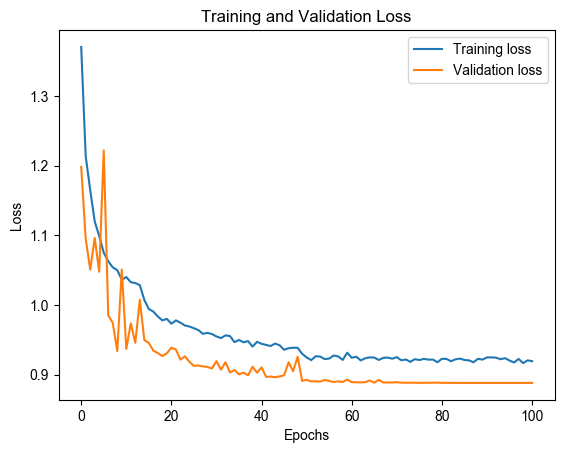

In [17]:
# 位置编码层
def get_positional_encoding(max_seq_len, embed_dim):
    positional_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / embed_dim) for j in range(embed_dim)]
        if pos != 0 else np.zeros(embed_dim) 
        for pos in range(max_seq_len)
    ])
    positional_enc[1:, 0::2] = np.sin(positional_enc[1:, 0::2])  # dim 2i
    positional_enc[1:, 1::2] = np.cos(positional_enc[1:, 1::2])  # dim 2i+1
    return positional_enc

# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# 获取序列最大长度和嵌入维度
seq_len = X_train_sequence.shape[1]
embed_dim = X_train_sequence.shape[2]

# 对序列特征加入位置编码
positional_encoding = get_positional_encoding(seq_len, embed_dim)
sequence_input_pos_encoded = sequence_input + positional_encoding

# Transformer 层
transformer_block = MultiHeadAttention(num_heads=4, key_dim=embed_dim)(sequence_input_pos_encoded, sequence_input_pos_encoded)
transformer_block = Dropout(0.1)(transformer_block)  # 添加 Dropout 减轻过拟合
transformer_block = LayerNormalization(epsilon=1e-6)(transformer_block)

# 序列特征扁平化后与数值特征合并
flattened_sequence_out = Flatten()(transformer_block)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接(Dense)层，无L2正则化，但包含Dropout
dense_1 = Dense(128, activation='relu')(combined_input)
dense_1 = Dropout(0.1)(dense_1)  # 添加 Dropout
dense_2 = Dense(64, activation='relu')(dense_1)
dense_2 = Dropout(0.1)(dense_2)  # 添加 Dropout

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(transformer_block)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input], 
                                            outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
                                            loss={'wait_time_output': 'mse', 
                                                  'queue_length_output': 'mse', 
                                                  'pkg_loss_rate_output': 'mse'}, 
                                            metrics={'wait_time_output': 'mae',
                                                     'queue_length_output': 'mae', 
                                                     'pkg_loss_rate_output': 'mae'})

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/4.2.png', dpi = 1200)
plt.show()

#### 4.3 Transformer + L2正则化 + Position Encoding

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 tf.__operators__.add (TFOp  (None, 20, 2)                0         ['sequence_input[0][0]']      
 Lambda)                                                                                          
                                                                                                  
 multi_head_attention (Mult  (None, 20, 2)                90        ['tf.__operators__.add[0][0]',
 iHeadAttention)                                                     'tf.__operators__.add[0

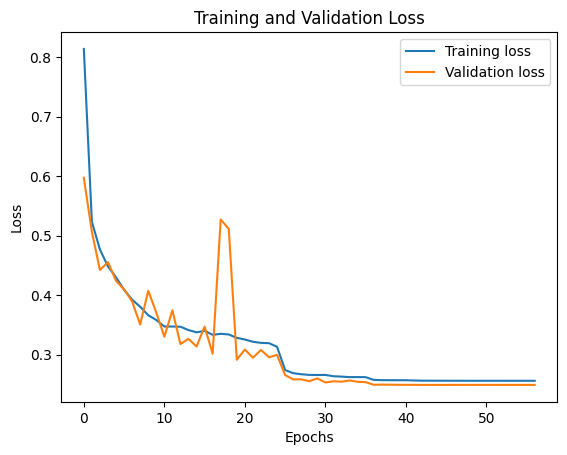

In [9]:
# 位置编码层
def get_positional_encoding(max_seq_len, embed_dim):
    positional_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / embed_dim) for j in range(embed_dim)]
        if pos != 0 else np.zeros(embed_dim) 
        for pos in range(max_seq_len)
    ])
    positional_enc[1:, 0::2] = np.sin(positional_enc[1:, 0::2])  # dim 2i
    positional_enc[1:, 1::2] = np.cos(positional_enc[1:, 1::2])  # dim 2i+1
    return positional_enc

# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# 获取序列最大长度和嵌入维度
seq_len = X_train_sequence.shape[1]
embed_dim = X_train_sequence.shape[2]

# 对序列特征加入位置编码
positional_encoding = get_positional_encoding(seq_len, embed_dim)
sequence_input_pos_encoded = sequence_input + positional_encoding

# Transformer 层
transformer_block = MultiHeadAttention(num_heads=4, key_dim=embed_dim)(sequence_input_pos_encoded, sequence_input_pos_encoded)
transformer_block = LayerNormalization(epsilon=1e-6)(transformer_block)

# 序列特征扁平化后与数值特征合并
flattened_sequence_out = Flatten()(transformer_block)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接(Dense)层，包含L2正则化，无Dropout
dense_1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(combined_input)
dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(dense_1)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(transformer_block)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input], 
                             outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
                             loss={'wait_time_output': 'mse', 
                                   'queue_length_output': 'mse', 
                                   'pkg_loss_rate_output': 'mse'}, 
                             metrics={'wait_time_output': 'mae',
                                      'queue_length_output': 'mae', 
                                      'pkg_loss_rate_output': 'mae'})

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/4.3.png', dpi = 1200)
plt.show()

#### 4.4 Transformer + Dropout + L2正则化 + Position Encoding

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 tf.__operators__.add_3 (TF  (None, 20, 2)                0         ['sequence_input[0][0]']      
 OpLambda)                                                                                        
                                                                                                  
 multi_head_attention_3 (Mu  (None, 20, 2)                90        ['tf.__operators__.add_3[0][0]
 ltiHeadAttention)                                                  ',                     

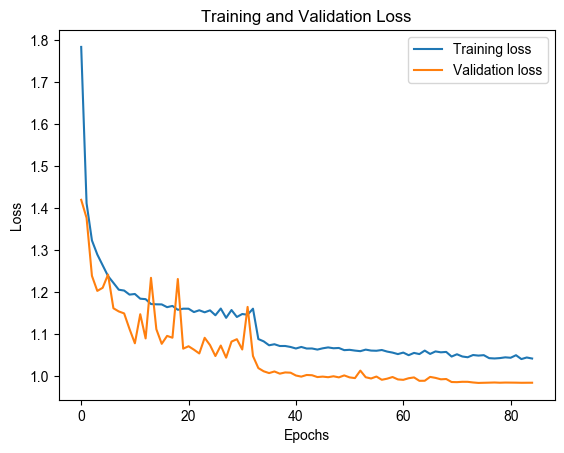

In [19]:
# 位置编码层
def get_positional_encoding(max_seq_len, embed_dim):
    positional_enc = np.array([
        [pos / np.power(10000, 2 * (j // 2) / embed_dim) for j in range(embed_dim)]
        if pos != 0 else np.zeros(embed_dim) 
        for pos in range(max_seq_len)
    ])
    positional_enc[1:, 0::2] = np.sin(positional_enc[1:, 0::2])  # dim 2i
    positional_enc[1:, 1::2] = np.cos(positional_enc[1:, 1::2])  # dim 2i+1
    return positional_enc

# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# 获取序列最大长度和嵌入维度
seq_len = sequence_input.shape[1]
embed_dim = sequence_input.shape[2]

# 对序列特征加入位置编码
positional_encoding = get_positional_encoding(seq_len, embed_dim)
sequence_input_pos_encoded = sequence_input + positional_encoding

# Transformer 层
transformer_block = MultiHeadAttention(num_heads=4, key_dim=embed_dim, dropout=0.1)(sequence_input_pos_encoded, sequence_input_pos_encoded)
transformer_block = Dropout(0.1)(transformer_block)
transformer_block = LayerNormalization(epsilon=1e-6)(transformer_block)

# 序列特征扁平化后与数值特征合并
flattened_sequence_out = Flatten()(transformer_block)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接(Dense)层，添加L2正则化
dense_1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(combined_input)
dense_1 = Dropout(0.1)(dense_1)
dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(dense_1)
dense_2 = Dropout(0.1)(dense_2)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(transformer_block)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(inputs=[numeric_input, sequence_input], 
              outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output])

# 编译模型
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss={'wait_time_output': 'mse',
                    'queue_length_output': 'mse',
                    'pkg_loss_rate_output': 'mse',
                }, 
            metrics={'wait_time_output': 'mae',
                     'queue_length_output': 'mae',
                     'pkg_loss_rate_output': 'mae',
            })

# 打印模型摘要以检查模型架构
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/4.4.png', dpi = 1200)
plt.show()

### 5. Transformer + 双层 Encoder

#### 5.1 Transformer + 双层 Encoder

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 multi_head_attention_1 (Mu  (None, 20, 2)                2818      ['sequence_input[0][0]',      
 ltiHeadAttention)                                                   'sequence_input[0][0]',      
                                                                     'sequence_input[0][0]']      
                                                                                                  
 layer_norm_1 (LayerNormali  (None, 20, 2)                4         ['multi_head_attention_

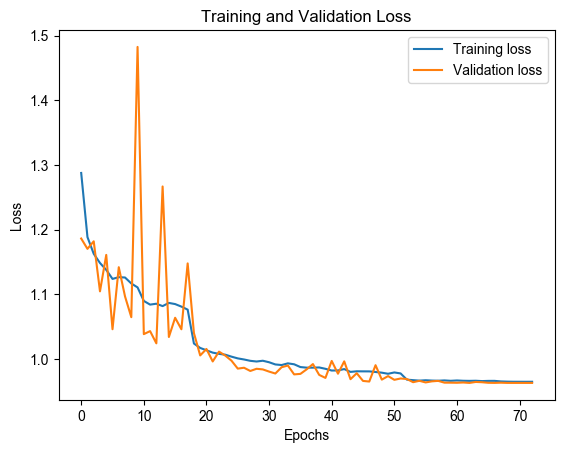

In [20]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# Transformer Encoder 层
transformer_enc_1 = MultiHeadAttention(num_heads=4, key_dim=64, name='multi_head_attention_1')(
    sequence_input, sequence_input, sequence_input)
transformer_enc_1 = LayerNormalization(epsilon=1e-6, name='layer_norm_1')(transformer_enc_1)

transformer_enc_2 = MultiHeadAttention(num_heads=4, key_dim=64, name='multi_head_attention_2')(
    transformer_enc_1, transformer_enc_1, transformer_enc_1)
transformer_enc_2_out = LayerNormalization(epsilon=1e-6, name='layer_norm_2')(transformer_enc_2)

# 序列输出和数值型输入的合并
flattened_sequence_out = Flatten()(transformer_enc_2_out)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接（Dense）层，无正则化和Dropout
dense_1 = Dense(128, activation='relu', name='dense_1')(combined_input)
dense_2 = Dense(64, activation='relu', name='dense_2')(dense_1)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(transformer_enc_2_out)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(
    inputs=[numeric_input, sequence_input],
    outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output]
)

# 编译模型
optimizer = Adam(learning_rate=0.001)  # 调整学习率
model.compile(
    optimizer=optimizer,
    loss={
        'wait_time_output': 'mse',
        'queue_length_output': 'mse',
        'pkg_loss_rate_output': 'mse'
    },
    loss_weights={
        'wait_time_output': 1.0,
        'queue_length_output': 0.5,
        'pkg_loss_rate_output': 0.5
    },
    metrics={
        'wait_time_output': 'mae',
        'queue_length_output': 'mae',
        'pkg_loss_rate_output': 'mae'
    }
)

# 打印模型摘要
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/5.1.png', dpi = 1200)
plt.show()

#### 5.2 Transformer + Dropout + 双层 Encoder

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 multi_head_attention_1 (Mu  (None, 20, 2)                2818      ['sequence_input[0][0]',      
 ltiHeadAttention)                                                   'sequence_input[0][0]',      
                                                                     'sequence_input[0][0]']      
                                                                                                  
 dropout_1 (Dropout)         (None, 20, 2)                0         ['multi_head_attention_

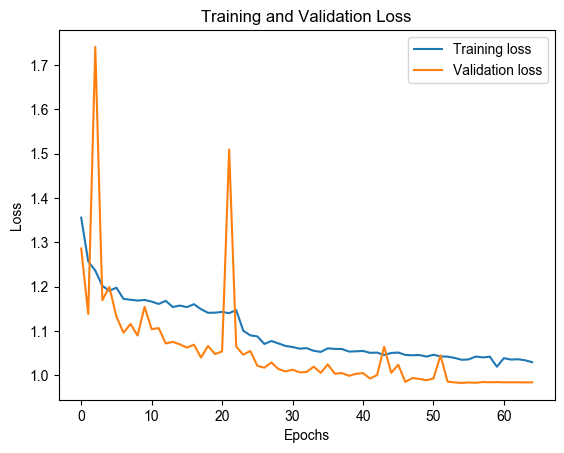

In [21]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# Transformer Encoder 层
transformer_enc_1 = MultiHeadAttention(num_heads=4, key_dim=64, name='multi_head_attention_1')(
    sequence_input, sequence_input, sequence_input)
transformer_enc_1 = Dropout(0.1, name='dropout_1')(transformer_enc_1)  # 添加 Dropout 减轻过拟合
transformer_enc_1 = LayerNormalization(epsilon=1e-6, name='layer_norm_1')(transformer_enc_1)

transformer_enc_2 = MultiHeadAttention(num_heads=4, key_dim=64, name='multi_head_attention_2')(
    transformer_enc_1, transformer_enc_1, transformer_enc_1)
transformer_enc_2 = Dropout(0.1, name='dropout_2')(transformer_enc_2)  # 添加 Dropout 减轻过拟合
transformer_enc_2_out = LayerNormalization(epsilon=1e-6, name='layer_norm_2')(transformer_enc_2)

# 序列输出和数值型输入的合并
flattened_sequence_out = Flatten()(transformer_enc_2_out)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接（Dense）层，无L2正则化，但包含Dropout
dense_1 = Dense(128, activation='relu', name='dense_1')(combined_input)
dense_1 = Dropout(0.2, name='dropout_dense_1')(dense_1)  # 添加 Dropout
dense_2 = Dense(64, activation='relu', name='dense_2')(dense_1)
dense_2 = Dropout(0.2, name='dropout_dense_2')(dense_2)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(transformer_enc_2_out)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(
    inputs=[numeric_input, sequence_input],
    outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output]
)

# 编译模型
optimizer = Adam(learning_rate=0.001)  # 调整学习率
model.compile(
    optimizer=optimizer,
    loss={
        'wait_time_output': 'mse',
        'queue_length_output': 'mse',
        'pkg_loss_rate_output': 'mse'
    },
    loss_weights={
        'wait_time_output': 1.0,
        'queue_length_output': 0.5,
        'pkg_loss_rate_output': 0.5
    },
    metrics={
        'wait_time_output': 'mae',
        'queue_length_output': 'mae',
        'pkg_loss_rate_output': 'mae'
    }
)

# 打印模型摘要
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/5.2.png', dpi = 1200)
plt.show()

#### 5.3 Transformer + L2正则化 + 双层 Encoder

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 multi_head_attention_1 (Mu  (None, 20, 2)                2818      ['sequence_input[0][0]',      
 ltiHeadAttention)                                                   'sequence_input[0][0]',      
                                                                     'sequence_input[0][0]']      
                                                                                                  
 layer_norm_1 (LayerNormali  (None, 20, 2)                4         ['multi_head_attention_

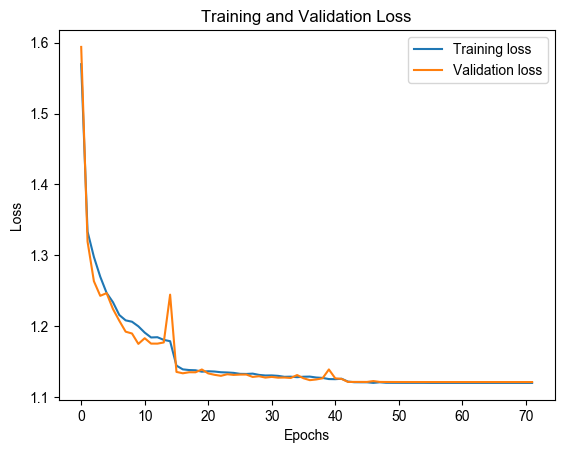

In [22]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# Transformer Encoder 层
transformer_enc_1 = MultiHeadAttention(num_heads=4, key_dim=64, name='multi_head_attention_1')(
    sequence_input, sequence_input, sequence_input)
transformer_enc_1 = LayerNormalization(epsilon=1e-6, name='layer_norm_1')(transformer_enc_1)

transformer_enc_2 = MultiHeadAttention(num_heads=4, key_dim=64, name='multi_head_attention_2')(
    transformer_enc_1, transformer_enc_1, transformer_enc_1)
transformer_enc_2_out = LayerNormalization(epsilon=1e-6, name='layer_norm_2')(transformer_enc_2)

# 序列输出和数值型输入的合并
flattened_sequence_out = Flatten()(transformer_enc_2_out)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接（Dense）层，包含L2正则化，无Dropout
dense_1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01), name='dense_1')(combined_input)
dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(0.01), name='dense_2')(dense_1)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(transformer_enc_2_out)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(
    inputs=[numeric_input, sequence_input],
    outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output]
)

# 编译模型
optimizer = Adam(learning_rate=0.001)  # 调整学习率
model.compile(
    optimizer=optimizer,
    loss={
        'wait_time_output': 'mse',
        'queue_length_output': 'mse',
        'pkg_loss_rate_output': 'mse'
    },
    loss_weights={
        'wait_time_output': 1.0,
        'queue_length_output': 0.5,
        'pkg_loss_rate_output': 0.5
    },
    metrics={
        'wait_time_output': 'mae',
        'queue_length_output': 'mae',
        'pkg_loss_rate_output': 'mae'
    }
)

# 打印模型摘要
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/5.3.png', dpi = 1200)
plt.show()

#### 5.4 Transformer + Dropout + L2正则化 + 双层 Encoder

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence_input (InputLayer  [(None, 20, 2)]              0         []                            
 )                                                                                                
                                                                                                  
 multi_head_attention_1 (Mu  (None, 20, 2)                2818      ['sequence_input[0][0]',      
 ltiHeadAttention)                                                   'sequence_input[0][0]',      
                                                                     'sequence_input[0][0]']      
                                                                                                  
 dropout_1 (Dropout)         (None, 20, 2)                0         ['multi_head_attention_

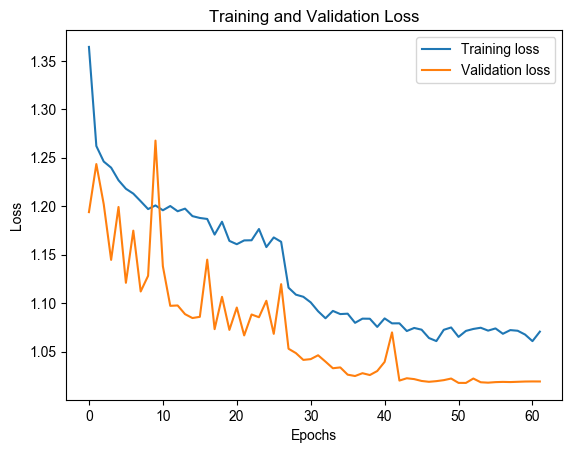

In [23]:
# 输入层
numeric_input = Input(shape=(X_train_numeric.shape[1],), name='numeric_input')
sequence_input = Input(shape=(X_train_sequence.shape[1], X_train_sequence.shape[2]), name='sequence_input')

# 初始 Transformer Encoder 层
transformer_enc_1 = MultiHeadAttention(num_heads=4, key_dim=64, dropout=0.1, name='multi_head_attention_1')(
    sequence_input, sequence_input, sequence_input)
transformer_enc_1 = Dropout(0.1, name='dropout_1')(transformer_enc_1)
transformer_enc_1 = LayerNormalization(epsilon=1e-6, name='layer_norm_1')(transformer_enc_1)

# 第二 Transformers Encoder 层 - 可以选择增加更多 Transformer 层
transformer_enc_2 = MultiHeadAttention(num_heads=4, key_dim=64, dropout=0.1, name='multi_head_attention_2')(
    transformer_enc_1, transformer_enc_1, transformer_enc_1)
transformer_enc_2 = Dropout(0.1, name='dropout_2')(transformer_enc_2)
transformer_enc_2_out = LayerNormalization(epsilon=1e-6, name='layer_norm_2')(transformer_enc_2)

# 序列输出和数值型输入的合并
flattened_sequence_out = Flatten()(transformer_enc_2_out)
combined_input = Concatenate()([numeric_input, flattened_sequence_out])

# 全连接（Dense）层
dense_1 = Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4), name='dense_1')(combined_input)
dense_1 = Dropout(0.2, name='dropout_dense_1')(dense_1)  # 添加 Dropout 层降低过拟合
dense_2 = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4), name='dense_2')(dense_1)
dense_2 = Dropout(0.2, name='dropout_dense_2')(dense_2)

# 输出层
wait_time_output = Dense(1, name='wait_time_output')(dense_2)
queue_length_output = TimeDistributed(Dense(1), name='queue_length_output')(transformer_enc_2_out)
pkg_loss_rate_output = Dense(1, name='pkg_loss_rate_output')(dense_2)

# 构建模型
model = Model(
    inputs=[numeric_input, sequence_input],
    outputs=[wait_time_output, queue_length_output, pkg_loss_rate_output]
)

# 编译模型
optimizer = Adam(learning_rate=0.001)  # 调整学习率
model.compile(
    optimizer=optimizer,
    loss={
        'wait_time_output': 'mse',
        'queue_length_output': 'mse',
        'pkg_loss_rate_output': 'mse'
    },
    loss_weights={
        'wait_time_output': 1.0,
        'queue_length_output': 0.5,
        'pkg_loss_rate_output': 0.5
    },
    metrics={
        'wait_time_output': 'mae',
        'queue_length_output': 'mae',
        'pkg_loss_rate_output': 'mae'
    }
)

# 打印模型摘要
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/5.4.png', dpi = 1200)
plt.show()

## 模型训练、模型评估与结果分析

### 增加 EarlyStopping 防止过拟合

Epoch 1/200
6256/6259 [============================>.] - ETA: 0s - loss: 1.0693 - wait_time_output_loss: 0.2805 - queue_length_output_loss: 1.0008 - pkg_loss_rate_output_loss: 0.5377 - wait_time_output_mae: 0.2213 - queue_length_output_mae: 0.8032 - pkg_loss_rate_output_mae: 0.5993
Epoch 1: val_loss improved from inf to 1.01781, saving model to best_model.h5
6259/6259 [==============================] - 46s 7ms/step - loss: 1.0693 - wait_time_output_loss: 0.2805 - queue_length_output_loss: 1.0009 - pkg_loss_rate_output_loss: 0.5378 - wait_time_output_mae: 0.2213 - queue_length_output_mae: 0.8032 - pkg_loss_rate_output_mae: 0.5993 - val_loss: 1.0178 - val_wait_time_output_loss: 0.2448 - val_queue_length_output_loss: 0.9966 - val_pkg_loss_rate_output_loss: 0.5106 - val_wait_time_output_mae: 0.2151 - val_queue_length_output_mae: 0.8022 - val_pkg_loss_rate_output_mae: 0.5846 - lr: 1.0000e-07
Epoch 2/200
6256/6259 [============================>.] - ETA: 0s - loss: 1.0695 - wait_time_output_l

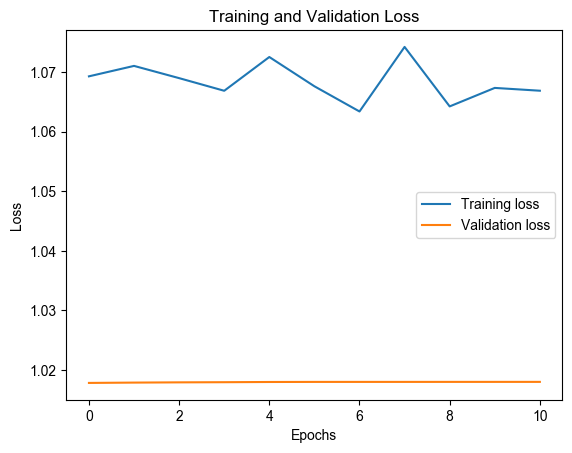

In [24]:
# 定义回调函数
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# 整理训练和测试数据
X_train = [X_train_numeric, X_train_sequence]
X_test = [X_test_numeric, X_test_sequence]
y_train = [y_train_wait, y_train_queue, y_train_pkg_loss]
y_test = [y_test_wait, y_test_queue, y_test_pkg_loss]

# 此时，X_train是一个列表，包含了用于训练的数值型和序列型特征
# y_train是一个列表，包含了所有训练标签

# 现在我们可以开始训练模型
history = model.fit(
    X_train,  # 训练数据，包括数值特征和序列特征
    y_train,  # 训练标签
    validation_data = (X_test, y_test),  # 验证数据
    epochs = 200,  # 或其他你选择的轮次数
    batch_size = 32,  # 或其他你选择的批大小
    verbose = 1,  # 显示所有输出
    callbacks = callbacks
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    X_test,  # 测试数据
    y_test,  # 测试标签
    verbose=1
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 如果你想要获取单独的损失和指标值，你需要知道 model.evaluate 返回了多少个值
# 例如，假设总损失、每个输出的损失，以及每个输出的metric是'loss', 'avg_wait_time_loss', 'queue_length_loss', 'pkg_loss_rate_loss', 'avg_wait_time_mae', 'queue_length_mae', 'pkg_loss_rate_mae'
total_loss, wait_time_loss, queue_length_loss, pkg_loss_rate_loss, wait_time_mae, queue_length_mae, pkg_loss_rate_mae = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Queue length MAE: {queue_length_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")

# 绘制训练损失和验证损失
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('模型效果/XX.png', dpi = 1200)
plt.show()

In [ ]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    SimpleRNN,
    Dense,
    TimeDistributed,
    concatenate,
    Masking,
    RepeatVector,
)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.sequence import pad_sequences

warnings.filterwarnings("ignore")

# 定义模型参数
hidden_units = 64  # RNN单元数量
sequence_input_length = max(df["n"])  # 序列长度设置为最大值

# 定义输入层
inputs = {}
for feature_name, feature_shape in zip(
    ["arrival_rate", "CV_list", "C_list"], [(sequence_input_length, 1)] * 3
):
    inputs[feature_name] = Input(shape=feature_shape, name=f"{feature_name}_input")
inputs["numeric_input"] = Input(shape=(X_train_numeric.shape[1],), name="numeric_input")

# RNN层
rnn_layers = {}
for feature_name, input_layer in inputs.items():
    if feature_name == "numeric_input":
        continue
    rnn_layers[feature_name] = SimpleRNN(hidden_units, return_sequences=True)(
        input_layer
    )

# 扩展numeric_input的形状以匹配RNN层的输出形状
numeric_input_expanded = RepeatVector(sequence_input_length)(inputs["numeric_input"])

# 合并所有输入
merged = concatenate(list(rnn_layers.values()) + [numeric_input_expanded])

# 定义输出层
outputs = {}
for output_name, output_shape in zip(
    ["wait_time_output", "pkg_loss_rate_output", "queue_waiting_length_output"],
    [(1,)] * 3,
):
    if output_name == "queue_waiting_length_output":
        outputs[output_name] = TimeDistributed(
            Dense(output_shape[-1]), name=output_name
        )(merged)
    else:
        outputs[output_name] = Dense(output_shape[-1], name=output_name)(merged)

# 填充训练集和测试集的序列型特征
max_sequence_length = max(df["n"])
X_train_padded_sequences = {}
X_test_padded_sequences = {}
for feature_name, feature_sequences in X_train_sequences.items():
    padded_sequences = pad_sequences(
        feature_sequences, maxlen=max_sequence_length, padding="post", dtype="float32"
    )
    X_train_padded_sequences[feature_name] = padded_sequences
    X_test_padded_sequences[feature_name] = pad_sequences(
        X_test_sequences[feature_name],
        maxlen=max_sequence_length,
        padding="post",
        dtype="float32",
    )

# 填充训练集和测试集的序列型目标变量
y_train_queue_padded = pad_sequences(
    y_train_queue, maxlen=max_sequence_length, padding="post", dtype="float32"
)
y_test_queue_padded = pad_sequences(
    y_test_queue, maxlen=max_sequence_length, padding="post", dtype="float32"
)

# 更新模型定义以包含Masking层
masked_layers = {}
for feature_name, input_layer in inputs.items():
    if feature_name == "numeric_input":
        continue
    masking_layer = Masking(mask_value=0.0)  # 假设填充值为0
    masked_layers[feature_name] = masking_layer(input_layer)

# RNN层
rnn_layers = {}
for feature_name, masked_layer in masked_layers.items():
    rnn_layers[feature_name] = SimpleRNN(hidden_units, return_sequences=True)(
        masked_layer
    )

# 构建模型
model = Model(inputs=inputs, outputs=outputs)

# 编译模型
model.compile(
    optimizer="adam",
    loss={
        "wait_time_output": "mse",
        "pkg_loss_rate_output": "mse",
        "queue_waiting_length_output": "mse",
    },
    metrics={
        "wait_time_output": "mae",
        "pkg_loss_rate_output": "mae",
        "queue_waiting_length_output": "mae",
    },
)

# 模型摘要
model.summary()

# 定义回调函数
callbacks = [
    EarlyStopping(
        monitor="val_loss", patience=10, verbose=1, restore_best_weights=True
    ),
    ModelCheckpoint(
        "best_model.h5", monitor="val_loss", save_best_only=True, verbose=1
    ),
    ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1),
]

# 训练模型时，我们需要使用填充后的序列和数值型特征
history = model.fit(
    {
        "arrival_rate": X_train_padded_sequences["arrival_rate"],
        "CV_list": X_train_padded_sequences["CV_list"],
        "C_list": X_train_padded_sequences["C_list"],
        "numeric_input": X_train_numeric,  # 数值型特征
    },
    {
        "wait_time_output": y_train_wait,
        "pkg_loss_rate_output": y_train_pkg_loss,
        "queue_waiting_length_output": y_train_queue_padded,
    },
    validation_data=(
        {
            "arrival_rate": X_test_padded_sequences["arrival_rate"],
            "CV_list": X_test_padded_sequences["CV_list"],
            "C_list": X_test_padded_sequences["C_list"],
            "numeric_input": X_test_numeric,  # 数值型特征
        },
        {
            "wait_time_output": y_test_wait,
            "pkg_loss_rate_output": y_test_pkg_loss,
            "queue_waiting_length_output": y_test_queue_padded,
        },
    ),
    epochs=200,  # 你可以根据需要调整epochs的数量
    batch_size=32,  # 你可以根据需要调整batch_size的大小
    callbacks=callbacks,
)

# 在模型训练结束后，使用测试数据评估模型性能
eval_results = model.evaluate(
    {
        "arrival_rate": X_test_padded_sequences["arrival_rate"],
        "CV_list": X_test_padded_sequences["CV_list"],
        "C_list": X_test_padded_sequences["C_list"],
        "numeric_input": X_test_numeric,  # 数值型特征
    },
    {
        "wait_time_output": y_test_wait,
        "pkg_loss_rate_output": y_test_pkg_loss,
        "queue_waiting_length_output": y_test_queue_padded,
    },
    verbose=1,
)

# 打印评估结果
print("Evaluation Results:", eval_results)

# 假设模型有三个输出和一个总损失，每个输出有一个损失和一个指标
(
    total_loss,
    wait_time_loss,
    pkg_loss_rate_loss,
    queue_length_loss,
    wait_time_mae,
    pkg_loss_rate_mae,
    queue_length_mae,
) = eval_results

# 打印损失和评价指标
print(f"Total loss: {total_loss}")
print(f"Avg wait time loss: {wait_time_loss}")
print(f"Pkg loss rate loss: {pkg_loss_rate_loss}")
print(f"Queue length loss: {queue_length_loss}")
print(f"Avg wait time MAE: {wait_time_mae}")
print(f"Pkg loss rate MAE: {pkg_loss_rate_mae}")
print(f"Queue length MAE: {queue_length_mae}")

# 绘制 avg_wait_time 的训练损失和验证损失
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history["wait_time_output_loss"], label="Training Wait Time Loss")
plt.plot(
    history.history["val_wait_time_output_loss"], label="Validation Wait Time Loss"
)
plt.title("Training and Validation Loss for Avg Wait Time")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 绘制 avg_pkg_loss_rate 的训练损失和验证损失
plt.subplot(1, 3, 2)
plt.plot(
    history.history["pkg_loss_rate_output_loss"], label="Training Pkg Loss Rate Loss"
)
plt.plot(
    history.history["val_pkg_loss_rate_output_loss"],
    label="Validation Pkg Loss Rate Loss",
)
plt.title("Training and Validation Loss for Pkg Loss Rate")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 绘制 queue_waiting_length_list 的训练损失和验证损失
plt.subplot(1, 3, 3)
plt.plot(
    history.history["queue_waiting_length_output_loss"],
    label="Training Queue Waiting Length Loss",
)
plt.plot(
    history.history["val_queue_waiting_length_output_loss"],
    label="Validation Queue Waiting Length Loss",
)
plt.title("Training and Validation Loss for Queue Waiting Length")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()